# Asset Performance Management

Scenario: We have been given data from a Chemical Processing plant that uses its equipement for heating and cooling the chemicals that it manufactures for its customers.

We have around 5 years of data for its pump, chilling units and heat exchangers. (These individual components are not critical for our purposes.)

**Goal**: But looking at the sensors and instrumented data over 5 years of history, we have to see if the asset is performing well, or whether we are seeing anomalies.


Input file for this task: `APM_Asset_operations.csv`

### Preparatory Tasks

1. Read the input file
2. Format the data into a proper time series (with datetime) Timestamps and floats for the sensor values
3. Plot each of the sensors

### Anomaly Detection
4. Are you able to spot (visually) any anomalies?
5. Could there be threshold values that are being violated (above or below control limits?) for 'normal' operation?
5a. How to set thresholds to detect any of these anomalies.

6. (Optional): Can you try applying any of the `skelarn` outlier detection techniques? Does that catch the anomalies we say visually.

## Questions

* Focus on `Fuel Pressure`, `Lubricant Temperature` and `Tank Level`?
    * What metrics could we apply to these?
* Insights: Can we conclude that there are any alarms or anomalies in the data that we are examining?
* If you compute the rolling mean (moving averages) for these values and overlay them with the data, can you detect any anomalies?

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [61]:
%matplotlib inline

## Data Prep Tasks

### 1. Read the input file

In [81]:
data = pd.read_csv('APM_Asset_operations.csv')
data

Time Rotor_shaft_speed Unit_Speed_RPM Lower_shaft_speed  \
0       1/30/13 0:00           99.9686      5098.3989          101.1093   
1       1/30/13 1:00           99.9924      5099.6123          101.5489   
2       1/30/13 2:00           99.9839      5099.1792          101.5569   
3       1/30/13 3:00          100.0077      5100.3926          102.1171   
4       1/30/13 4:00           99.9924      5099.6123          102.1025   
5       1/30/13 5:00           99.9941      5099.6992          102.1171   
6       1/30/13 6:00           99.9958      5099.7856          102.1122   
7       1/30/13 7:00          100.0043      5100.2192          102.1155   
8       1/30/13 8:00           99.9975      5099.8726           102.122   
9       1/30/13 9:00           99.9941      5099.6992          102.1122   
10     1/30/13 10:00           99.9805      5099.0059          102.1512   
11     1/30/13 11:00          100.0094      5100.4795          102.1106   
12     1/30/13 12:00          100.0213      5101.0864           102.109   
13     1/30/13 13:00           99.9856      5099.2656          102.1057   
14     1/30/13 14:00           99.9839      5099.1792           102.109   
15     1/30/13 15:00            99.989       5099.439          102.1268   
16     1/30/13 16:00           99.9958      5099.7856          102.1171   
17     1/30/13 17:00          100.0128      5100.6528           102.109   
18     1/30/13 18:00            99.989       5099.439          102.8331   
19     1/30/13 19:00          100.0043      5100.2192           102.843   
20     1/30/13 20:00          100.0128      5100.6528          102.8561   
21     1/30/13 21:00           99.9941      5099.6992          102.8347   
22     1/30/13 22:00            99.989       5099.439          102.8084   
23     1/30/13 23:00           99.9975      5099.8726          101.9194   
24      1/31/13 0:00           99.9941      5099.6992          101.9324   
25      1/31/13 1:00           99.9805      5099.0059          101.9421   
26      1/31/13 2:00           99.9805      5099.0059           101.934   
27      1/31/13 3:00          100.0077      5100.3926          101.9405   
28      1/31/13 4:00          100.0196           5101          101.4959   
29      1/31/13 5:00          100.0043      5100.2192           98.8746   
...              ...               ...            ...               ...   
43972    2/5/18 4:00           99.9892      5100.2197           96.8078   
43973    2/5/18 5:00          100.0007      5099.4219           96.8018   
43974    2/5/18 6:00           99.9894      5099.0059           96.8072   
43975    2/5/18 7:00          100.0122      5100.2817           96.8065   
43976    2/5/18 8:00          100.0162      5099.6343           96.1484   
43977    2/5/18 9:00           99.9886      5099.4219           95.5921   
43978   2/5/18 10:00          100.0245      5099.3101           95.5933   
43979   2/5/18 11:00          100.0056      5099.8794           95.5968   
43980   2/5/18 12:00          100.0078      5101.3301           95.6125   
43981   2/5/18 13:00          100.0128      5100.3091           96.1119   
43982   2/5/18 14:00           99.9867      5099.0059           96.0775   
43983   2/5/18 15:00            99.989      5100.3931            95.696   
43984   2/5/18 16:00          100.0211      5101.0122           95.6988   
43985   2/5/18 17:00           99.9808      5100.2661           95.8117   
43986   2/5/18 18:00           99.9812      5100.3325           95.9527   
43987   2/5/18 19:00           99.9817      5100.3984           96.0937   
43988   2/5/18 20:00           99.9821      5100.4644           96.2348   
43989   2/5/18 21:00           99.9813      5100.3267           96.2645   
43990   2/5/18 22:00          100.0033      5100.0117           96.8938   
43991   2/5/18 23:00          100.0141      5099.6343           96.8737   
43992    2/6/18 0:00          100.0044      5099.6094            96.876   
43993    2/6/18 1:00           99.9808   

### 2. Format the data into a proper time series (with datetime) Timestamps and floats for the sensor values

In [82]:
data['Time'] =pd.to_datetime(data['Time'])
data

Time Rotor_shaft_speed Unit_Speed_RPM Lower_shaft_speed  \
0     2013-01-30 00:00:00           99.9686      5098.3989          101.1093   
1     2013-01-30 01:00:00           99.9924      5099.6123          101.5489   
2     2013-01-30 02:00:00           99.9839      5099.1792          101.5569   
3     2013-01-30 03:00:00          100.0077      5100.3926          102.1171   
4     2013-01-30 04:00:00           99.9924      5099.6123          102.1025   
5     2013-01-30 05:00:00           99.9941      5099.6992          102.1171   
6     2013-01-30 06:00:00           99.9958      5099.7856          102.1122   
7     2013-01-30 07:00:00          100.0043      5100.2192          102.1155   
8     2013-01-30 08:00:00           99.9975      5099.8726           102.122   
9     2013-01-30 09:00:00           99.9941      5099.6992          102.1122   
10    2013-01-30 10:00:00           99.9805      5099.0059          102.1512   
11    2013-01-30 11:00:00          100.0094      5100.4795          102.1106   
12    2013-01-30 12:00:00          100.0213      5101.0864           102.109   
13    2013-01-30 13:00:00           99.9856      5099.2656          102.1057   
14    2013-01-30 14:00:00           99.9839      5099.1792           102.109   
15    2013-01-30 15:00:00            99.989       5099.439          102.1268   
16    2013-01-30 16:00:00           99.9958      5099.7856          102.1171   
17    2013-01-30 17:00:00          100.0128      5100.6528           102.109   
18    2013-01-30 18:00:00            99.989       5099.439          102.8331   
19    2013-01-30 19:00:00          100.0043      5100.2192           102.843   
20    2013-01-30 20:00:00          100.0128      5100.6528          102.8561   
21    2013-01-30 21:00:00           99.9941      5099.6992          102.8347   
22    2013-01-30 22:00:00            99.989       5099.439          102.8084   
23    2013-01-30 23:00:00           99.9975      5099.8726          101.9194   
24    2013-01-31 00:00:00           99.9941      5099.6992          101.9324   
25    2013-01-31 01:00:00           99.9805      5099.0059          101.9421   
26    2013-01-31 02:00:00           99.9805      5099.0059           101.934   
27    2013-01-31 03:00:00          100.0077      5100.3926          101.9405   
28    2013-01-31 04:00:00          100.0196           5101          101.4959   
29    2013-01-31 05:00:00          100.0043      5100.2192           98.8746   
...                   ...               ...            ...               ...   
43972 2018-02-05 04:00:00           99.9892      5100.2197           96.8078   
43973 2018-02-05 05:00:00          100.0007      5099.4219           96.8018   
43974 2018-02-05 06:00:00           99.9894      5099.0059           96.8072   
43975 2018-02-05 07:00:00          100.0122      5100.2817           96.8065   
43976 2018-02-05 08:00:00          100.0162      5099.6343           96.1484   
43977 2018-02-05 09:00:00           99.9886      5099.4219           95.5921   
43978 2018-02-05 10:00:00          100.0245      5099.3101           95.5933   
43979 2018-02-05 11:00:00          100.0056      5099.8794           95.5968   
43980 2018-02-05 12:00:00          100.0078      5101.3301           95.6125   
43981 2018-02-05 13:00:00          100.0128      5100.3091           96.1119   
43982 2018-02-05 14:00:00           99.9867      5099.0059           96.0775   
43983 2018-02-05 15:00:00            99.989      5100.3931            95.696   
43984 2018-02-05 16:00:00          100.0211      5101.0122           95.6988   
43985 2018-02-05 17:00:00           99.9808      5100.2661           95.8117   
43986 2018-02-05 18:00:00           99.9812      5100.3325           95.9527   
43987 2018-02-05 19:00:00           99.9817      5100.3984           96.0937   
43988 2018-02-05 20:00:00           99.9821      5100.4644           96.2348   
43989 2018-02-05 21:00:00           99.9813      5100.3267           96.2645   
43990 2018-02-05 22:0

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44002 entries, 0 to 44001
Data columns (total 16 columns):
Time                  44002 non-null datetime64[ns]
Rotor_shaft_speed     44002 non-null object
Unit_Speed_RPM        44002 non-null object
Lower_shaft_speed     44002 non-null object
Line_Speed_RPM        44002 non-null object
Pressure_diff1        44002 non-null object
Pressure_diff2        44002 non-null object
Pressure_diff3        44002 non-null object
Pressure_loss         44002 non-null object
Inlet_Avg_Temp        44002 non-null object
Discharge_Avg_Temp    44002 non-null object
Discharge_Pressure    44002 non-null object
Outlet_Avg_Temp       44002 non-null object
Fuel_pressure         44002 non-null object
Lubricant_Temp        44002 non-null object
Oil_tank_level        44002 non-null object
dtypes: datetime64[ns](1), object(15)
memory usage: 5.4+ MB


In [84]:
data = data.convert_objects(convert_numeric=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44002 entries, 0 to 44001
Data columns (total 16 columns):
Time                  44002 non-null datetime64[ns]
Rotor_shaft_speed     43221 non-null float64
Unit_Speed_RPM        43221 non-null float64
Lower_shaft_speed     43221 non-null float64
Line_Speed_RPM        43221 non-null float64
Pressure_diff1        43221 non-null float64
Pressure_diff2        43221 non-null float64
Pressure_diff3        43221 non-null float64
Pressure_loss         43221 non-null float64
Inlet_Avg_Temp        43221 non-null float64
Discharge_Avg_Temp    43221 non-null float64
Discharge_Pressure    43221 non-null float64
Outlet_Avg_Temp       43221 non-null float64
Fuel_pressure         43221 non-null float64
Lubricant_Temp        43221 non-null float64
Oil_tank_level        43221 non-null float64
dtypes: datetime64[ns](1), float64(15)
memory usage: 5.4 MB


### 3. Plot each of the sensors

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C5C94E1320>,
      dtype=object)

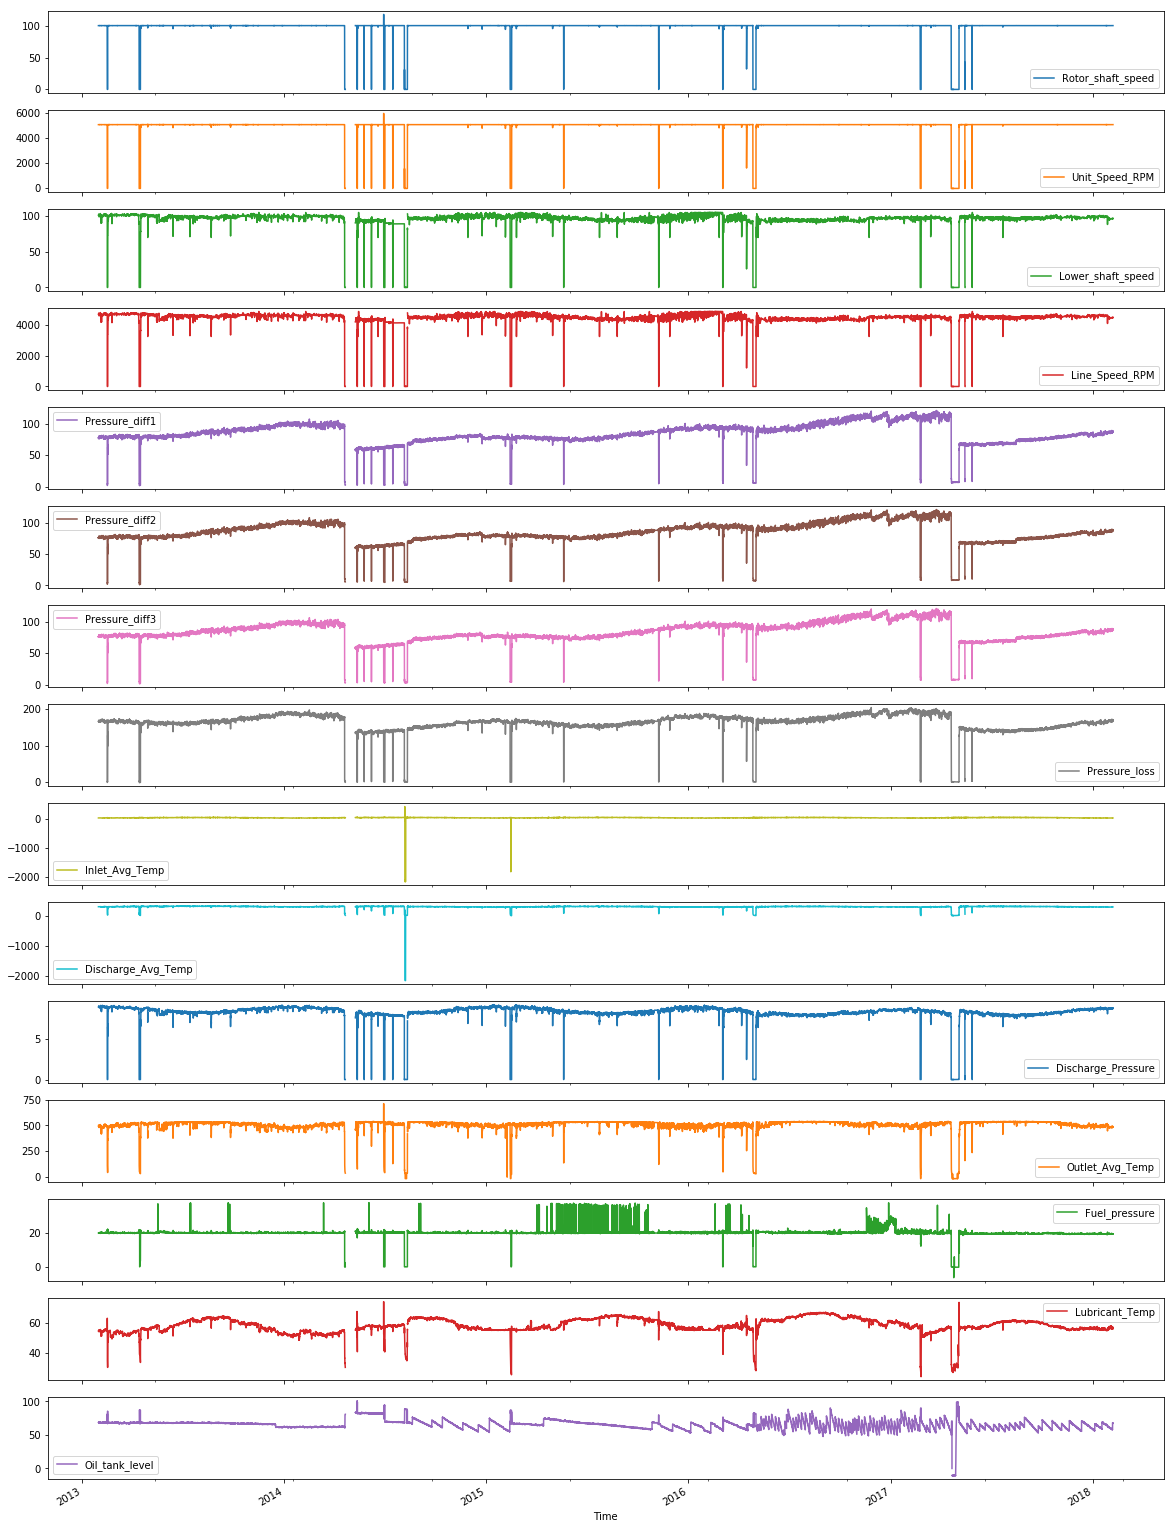

In [86]:
data.set_index('Time').plot(subplots=True, figsize=(20,30))

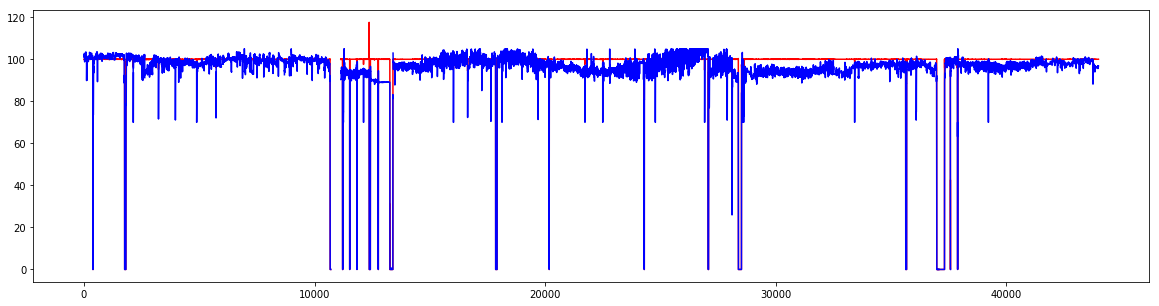

In [87]:
#Speed Plot

fig = plt.figure(figsize=(20, 5))
plt.plot(data.index, data['Rotor_shaft_speed'], color ='red')
plt.plot(data.index, data['Lower_shaft_speed'], color ='blue')
plt.show()

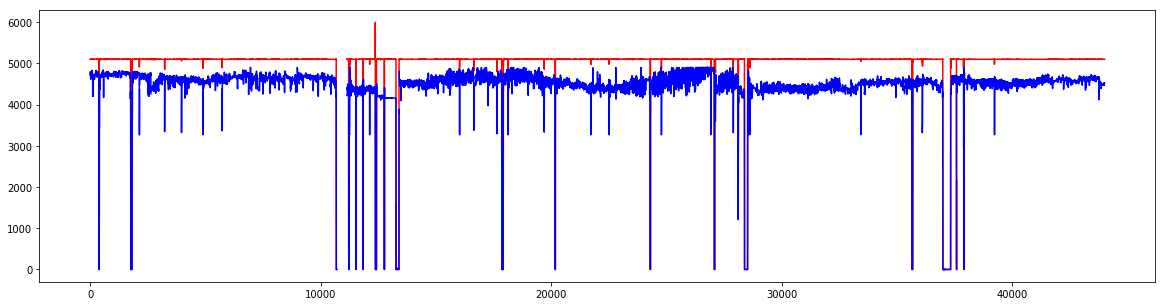

In [88]:
#RPM Plot

fig = plt.figure(figsize=(20, 5))
plt.plot(data.index, data['Unit_Speed_RPM'], color ='red')
plt.plot(data.index, data['Line_Speed_RPM'], color ='blue')
plt.show()

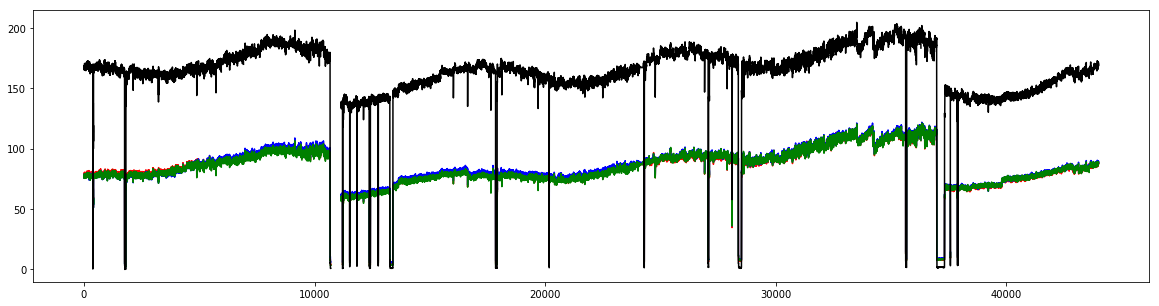

In [89]:
##Pressure_diff

fig = plt.figure(figsize=(20, 5))
plt.plot(data.index, data['Pressure_diff1'], color ='red')
plt.plot(data.index, data['Pressure_diff2'], color ='blue')
plt.plot(data.index, data['Pressure_diff3'], color ='green')
plt.plot(data.index, data['Pressure_loss'], color ='black')
plt.show()

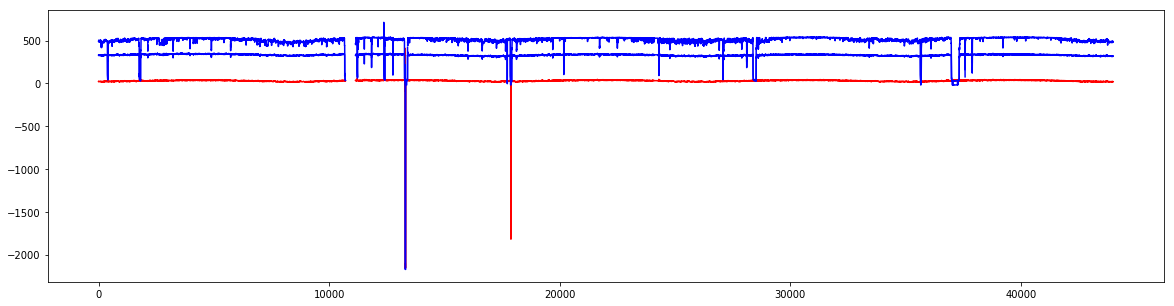

In [90]:
##Pressure_diff

fig = plt.figure(figsize=(20, 5))
plt.plot(data.index, data['Inlet_Avg_Temp'], color ='red')
plt.plot(data.index, data['Discharge_Avg_Temp'], color ='blue')
plt.plot(data.index, data['Outlet_Avg_Temp'], color ='blue')
plt.show()

## Anomaly Detection Tasks

### 4. Are you able to spot (visually) any anomalies?

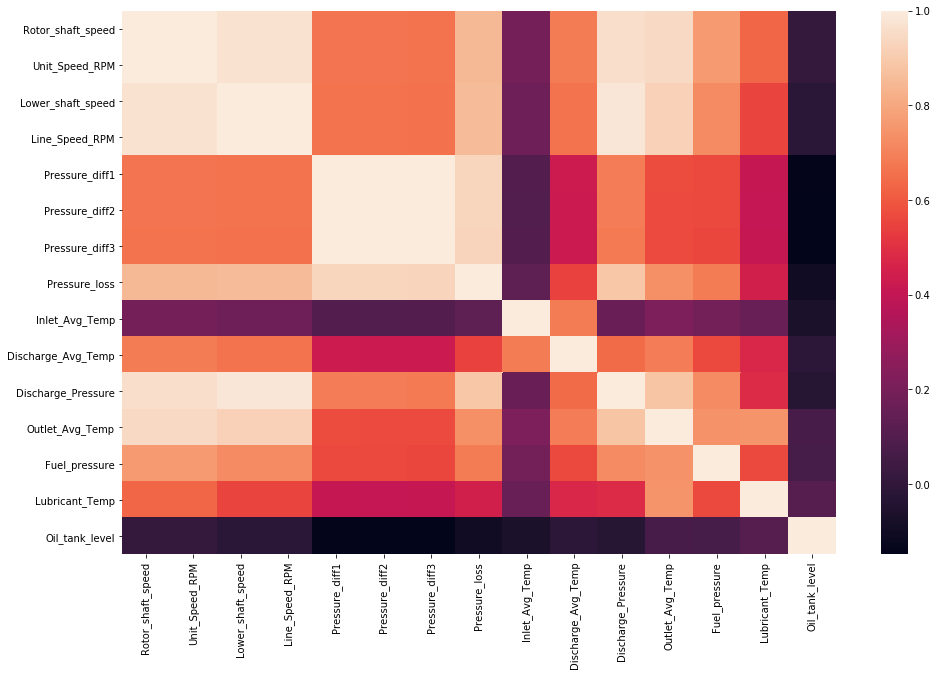

In [91]:
corr = data.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, xticklabels=corr.columns.values)

YES

There are numerous drops in RPM, Speed and Pressure differential

Plots are grouped to similar and possibly related plots. On the Speed plots, it can be seen that Rotor_shaft_speed and Lower_shaft_speed usually follow the same pettern, however there an instance where the Rotor_shaft_speed just above the normal 100 speed while Lower_shaft_speed doesnt follow.

### 5. Could there be threshold values that are being violated (above or below control limits?) for 'normal' operation? 

YES.

Plots are grouped to similar and possibly related plots. On the Speed plots, it can be seen that Rotor_shaft_speed and Lower_shaft_speed usually follow the same pettern, however there an instance where the Rotor_shaft_speed just above the normal 100 speed while Lower_shaft_speed doesnt follow.

### 5a. How to set thresholds to detect any of these anomalies.

The mean and standard deviation could be used to set threshold that could be used for anomalie detection.  

If a value is a certain number of standard deviations away from the mean, that data point is identified as an anomaly. The specified number of standard deviations is called the threshold. For a highperformance system like this on a threshold of 2 standard deviation is applied. This method can fail to detect outliers because the outliers increase the standard deviation. The more extreme the outlier, the more the standard deviation is affected.

In [92]:
data.mean()

Rotor_shaft_speed       97.830478
Unit_Speed_RPM        4989.337729
Lower_shaft_speed       95.291390
Line_Speed_RPM        4450.134480
Pressure_diff1          83.894532
Pressure_diff2          84.841734
Pressure_diff3          83.562924
Pressure_loss          162.851943
Inlet_Avg_Temp          28.407816
Discharge_Avg_Temp     324.235848
Discharge_Pressure       8.157538
Outlet_Avg_Temp        503.345469
Fuel_pressure           19.724214
Lubricant_Temp          58.145364
Oil_tank_level          65.543950
dtype: float64

In [93]:
data.std()

Rotor_shaft_speed      14.498846
Unit_Speed_RPM        739.439577
Lower_shaft_speed      14.585365
Line_Speed_RPM        681.110783
Pressure_diff1         17.227659
Pressure_diff2         17.277755
Pressure_diff3         17.306860
Pressure_loss          28.214568
Inlet_Avg_Temp         66.400100
Discharge_Avg_Temp     71.969237
Discharge_Pressure      1.260595
Outlet_Avg_Temp        73.211505
Fuel_pressure           2.938076
Lubricant_Temp          5.015666
Oil_tank_level          7.904904
dtype: float64

### 6. (Optional): Can you try applying any of the skelarn outlier detection techniques? Does that catch the anomalies we say visually.

###### DBSCAN — Density-Based Spatial Clustering of Applications with Noise Another way to find the outliers is DBSCAN which uses clustering. In this method, we calculate the distance between points (the Euclidean distance or some other distance) and look for points which are far away from others.

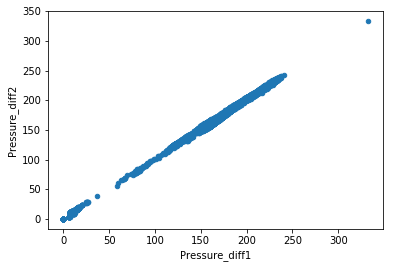

In [94]:
data = data.set_index(['Time'])
data = data.resample(rule='2H', closed='left', label='left', base=17).sum()

# Note: Resampled because I was getting a memory error


Pressure_diff = data[["Pressure_diff1", "Pressure_diff2"]]
Pressure_diff.plot.scatter(x = "Pressure_diff1", y = "Pressure_diff2")

In [95]:
Pressure_diff = Pressure_diff.dropna()

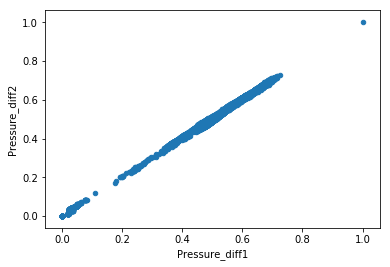

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Pressure_diff = scaler.fit_transform(Pressure_diff)
Pressure_diff = pd.DataFrame(Pressure_diff, columns = ["Pressure_diff1", "Pressure_diff2"])
Pressure_diff.plot.scatter(x = "Pressure_diff1", y = "Pressure_diff2")

In [99]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)
clusters = outlier_detection.fit_predict(Pressure_diff)
print(clusters)

[0 0 0 ... 0 0 0]


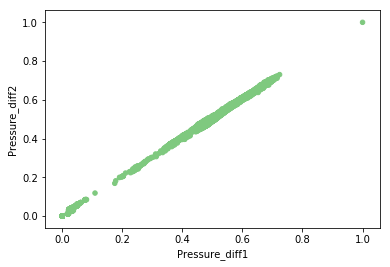

In [98]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
Pressure_diff.plot.scatter(
  x = "Pressure_diff1",
  y = "Pressure_diff2",
  c = clusters,
  cmap = cmap,
  colorbar = False
)

# Conclusions and Recommendations

The DBSCAN  implemented above could not high light anomalies in the Pressure differential